In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 12,8

In [2]:
# read in data - data in same folder as notebook

movies = pd.read_csv('movies.csv')

In [3]:
# seems data only goes up to 2020

movies
# movies.dtypes


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# data cleaning - #get percent missing in each column

# na_index = [] #get index of NA per column
na_per = [] 

for col in movies.columns:
    # na_index.append(np.where(movies[col].isna()))
    col_per = round(np.mean(movies[col].isna()) * 100, 2)
    print(f'{col} : {col_per} %')
    na_per.append(col_per)
    

name : 0.0 %
rating : 1.0 %
genre : 0.0 %
year : 0.0 %
released : 0.03 %
score : 0.04 %
votes : 0.04 %
director : 0.0 %
writer : 0.04 %
star : 0.01 %
country : 0.04 %
budget : 28.31 %
gross : 2.46 %
company : 0.22 %
runtime : 0.05 %


In [5]:
movies[['year', 'released']][240:250] #noticed some years dont match released like 248, google says released is correct

,year,released
240,1982,"July 23, 1982 (United States)"
241,1982,"May 21, 1982 (United States)"
242,1982,"July 23, 1982 (United States)"
243,1982,"February 18, 1983 (United States)"
244,1982,"July 30, 1982 (United States)"
245,1982,"July 16, 1982 (United States)"
246,1982,"March 19, 1982 (United States)"
247,1982,"November 19, 1982 (United States)"
248,1982,"February 4, 1983 (United States)"
249,1982,"December 10, 1982 (United States)"


In [6]:
para_index = movies['released'].astype(str).str.find('(')
year_indstart = para_index - 5
year_indend = para_index - 1

years_corrected = [] 
for i, date in enumerate(movies['released'].sort_index()):
    if isinstance(movies['released'][i],str):
        years_corrected.append(int(movies['released'][i][year_indstart[i]:year_indend[i]]))
    else:
        years_corrected.append(0)

movies['correct_year'] = years_corrected
movies['net'] = movies['gross'] - movies['budget']

In [7]:
# top grossing by 2020

movies.sort_values(by=['gross'], inplace = True, ascending = False)

<Axes: xlabel='budget', ylabel='gross'>

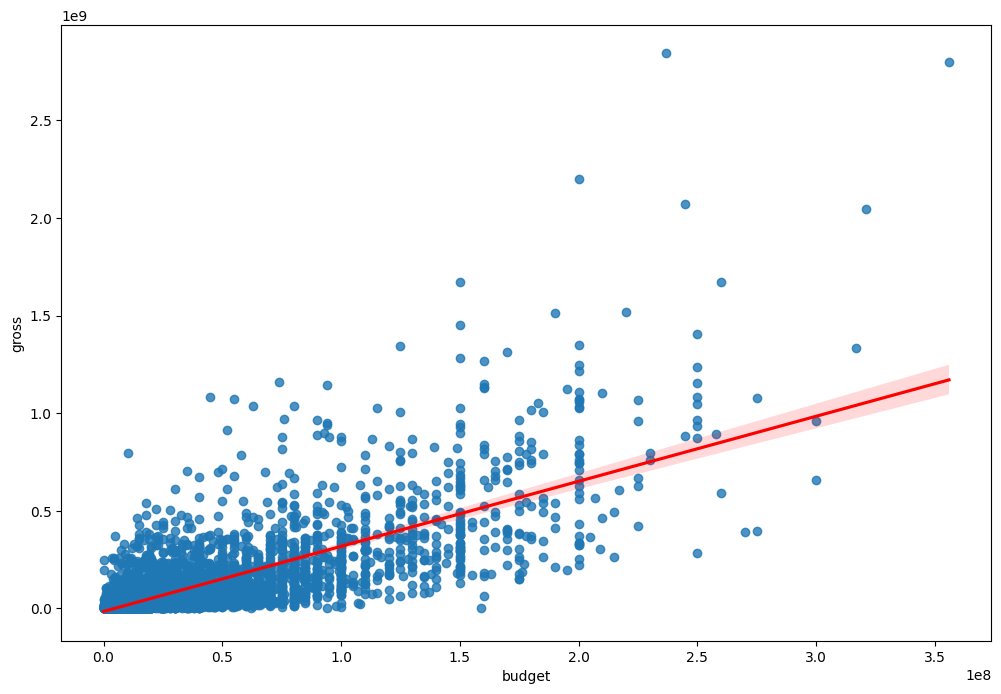

In [8]:
# regression plot

sns.regplot(x='budget', y='gross', data=movies, line_kws={'color': 'red'})

scatter plot indicates a positive correlation between budget and gross. More money in = more money out in general.

In [9]:
# using numeric features from movies, find correlation matrix

corr_matrix1 = movies[['budget', 'gross', 'net', 'runtime','score','votes','correct_year']].corr()
corr_matrix1

,budget,gross,net,runtime,score,votes,correct_year
budget,1.000000,0.740395,0.610661,0.320447,0.076254,0.442429,0.321918
gross,0.740395,1.000000,0.984418,0.245216,0.186258,0.630757,0.250514
net,0.610661,0.984418,1.000000,0.241337,0.242928,0.609313,0.232693
runtime,0.320447,0.245216,0.241337,1.000000,0.399451,0.309212,0.120636
score,0.076254,0.186258,0.242928,0.399451,1.000000,0.409182,0.045473
votes,0.442429,0.630757,0.609313,0.309212,0.409182,1.000000,0.070314
correct_year,0.321918,0.250514,0.232693,0.120636,0.045473,0.070314,1.000000


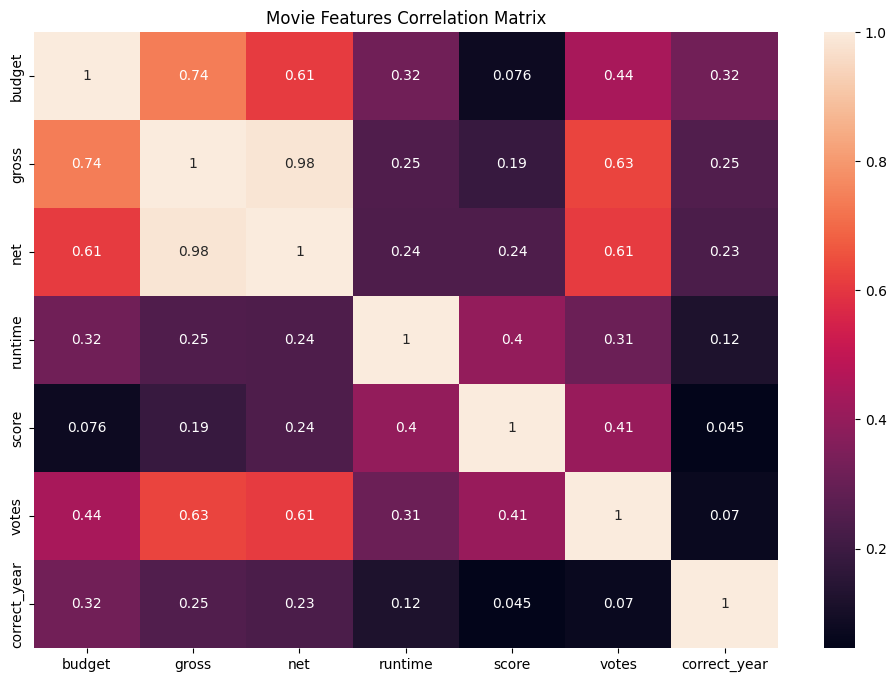

In [10]:
# visualize correlation using heatmap

sns.heatmap(corr_matrix1, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [11]:
# assign dummy variables to categorical variables and create dictionary to retrieve original name from dummy variable later

movies_conv = movies.copy()
dummy_dic = {}

for col in movies_conv.columns:
    if movies_conv[col].dtype == 'object':
        movies_conv[col] = movies_conv[col].astype('category')
        # add category to dictionary
        dummy_dic[col] = dict(enumerate(movies_conv[col].cat.categories))
        # convert category to dummy value
        movies_conv[col] = movies_conv[col].cat.codes
        


movies_conv = movies_conv.drop(columns=['year'])
movies_conv

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,net
5445,533,5,0,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009,2.610246e+09
7445,535,5,0,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019,2.441501e+09
3045,6896,5,6,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997,2.001647e+09
6663,5144,5,0,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015,1.824522e+09
7244,536,5,0,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018,1.727360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2020,NaN
7664,1678,-1,4,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,2020,NaN
7665,4717,-1,6,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,2020,NaN
7666,2843,-1,6,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2020,NaN


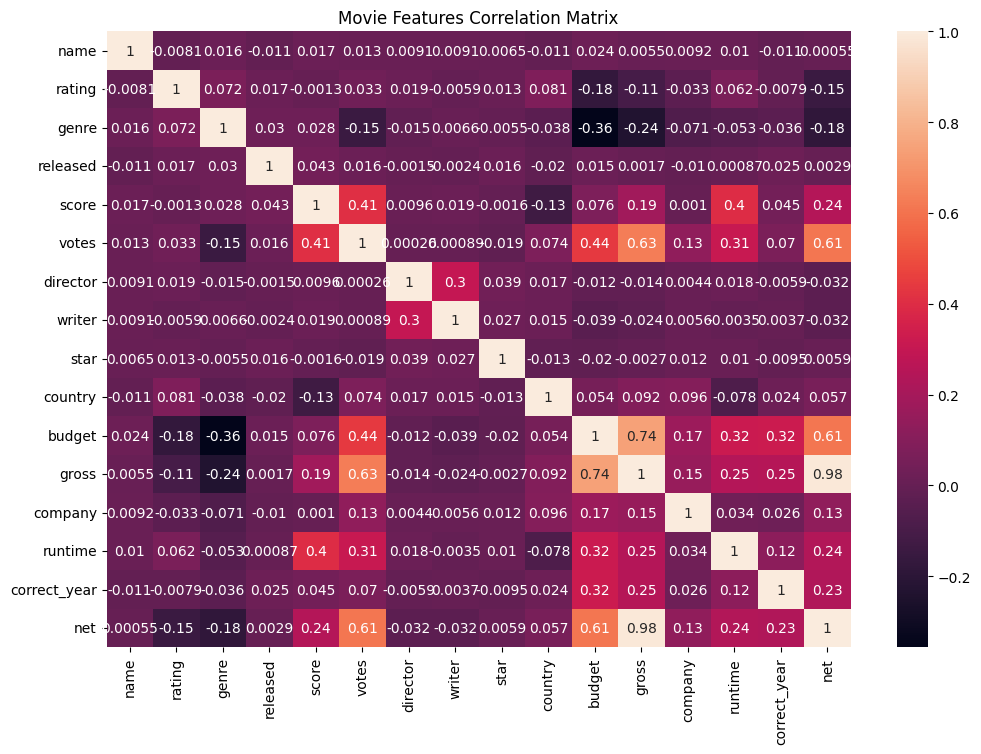

In [12]:
corr_matrix2 = movies_conv.corr()

sns.heatmap(corr_matrix2, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [13]:
# find correlation between pairs of features

corr_pairs = corr_matrix2.unstack().sort_values()

corr_pairs

genre         budget         -0.356564
budget        genre          -0.356564
genre         gross          -0.235650
gross         genre          -0.235650
genre         net            -0.182410
                                ...   
released      released        1.000000
genre         genre           1.000000
rating        rating          1.000000
correct_year  correct_year    1.000000
net           net             1.000000
Length: 256, dtype: float64

In [14]:
high_corr = corr_pairs[corr_pairs >= 0.5]
high_corr = high_corr[high_corr < 1]

high_corr

votes   net       0.609313
net     votes     0.609313
        budget    0.610661
budget  net       0.610661
votes   gross     0.630757
gross   votes     0.630757
        budget    0.740395
budget  gross     0.740395
net     gross     0.984418
gross   net       0.984418
dtype: float64

From the data, we can see that the highest correlation to net profit are budget, gross profit, and movie votes. We choose to ignore votes and gross since these statistic are post release measure meaning it isn't available during production or shortly before release.

In [16]:
movies_conv.budget.fillna(movies_conv.budget.median(), inplace=True)
movies_conv.gross.fillna(movies_conv.gross.median(), inplace=True)
movies_conv.fillna(0, inplace=True)

movies_conv.isna().any()

From the correlation matrix, we can see that there are many pairs that is not our focus are correlated too. This will cause issues in our analyses using regression models since no correlation between predictor variables is an assumption for regression models. We can try to remove these multicollinear features using dimensionality reduction techniques like PCA or models that are robust to multicollinearity like Elasticnet Regression.

In [19]:
movies_conv

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year,net
5445,533,5,0,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009,2.610246e+09
7445,535,5,0,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019,2.441501e+09
3045,6896,5,6,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997,2.001647e+09
6663,5144,5,0,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015,1.824522e+09
7244,536,5,0,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018,1.727360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2964,3.1,18.0,1500,2289,2421,55,7000.0,2.020576e+07,-1,90.0,2020,0.000000e+00
7664,1678,-1,4,1107,4.7,36.0,774,2614,1886,55,20500000.0,2.020576e+07,539,90.0,2020,0.000000e+00
7665,4717,-1,6,193,5.7,29.0,2061,2683,2040,55,58750.0,2.020576e+07,941,0.0,2020,0.000000e+00
7666,2843,-1,6,2817,0.0,0.0,1184,1824,450,55,15000.0,2.020576e+07,-1,120.0,2020,0.000000e+00


In [20]:
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [21]:
# net profit will be our target variable for this exerecise

y_net = movies_conv['net']

movies_features = list(movies_conv.columns)
movies_features.remove('net')

# remove gross, votes, and score since they are post movie release statistics. 
movies_features.remove('gross')
movies_features.remove('votes')
movies_features.remove('score')

X_movies = movies_conv[movies_features]



12 features, reduction of 0.00%


<Axes: >

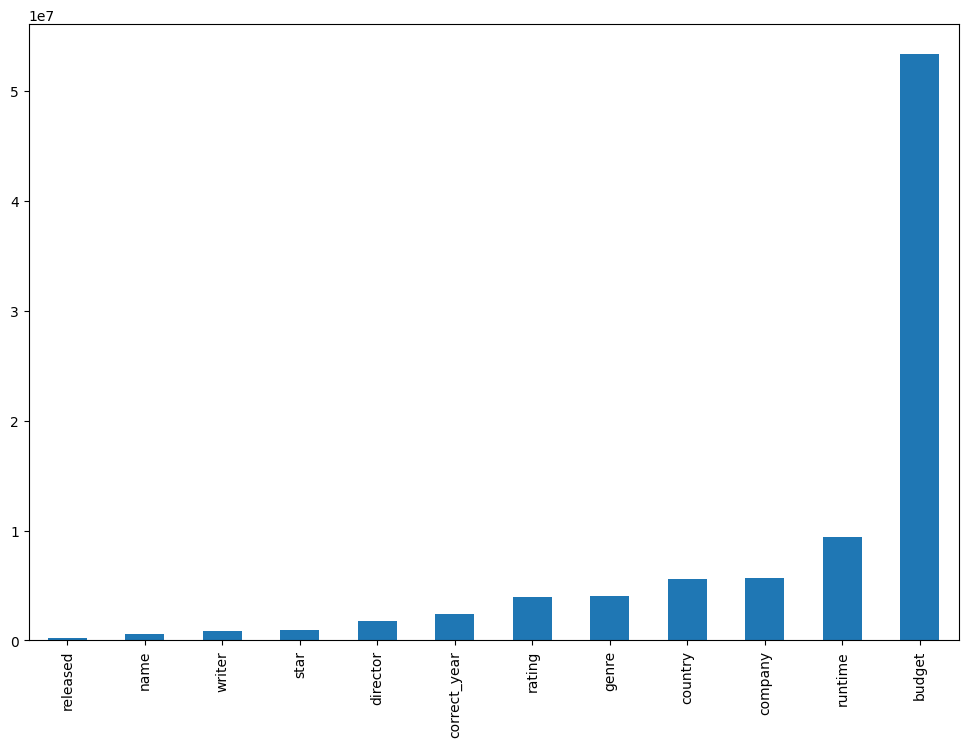

In [22]:
# elastic net requires normalization since penalty coefficients are the same for all variables 

gross_model = make_pipeline(StandardScaler(), lm.ElasticNet(random_state=0))

gross_model.fit(X_movies, y_net)

feature_importance = pd.Series(index = X_movies.columns, data = np.abs(gross_model.steps[1][1].coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar')

6 features, reduction of 50.00%


<Axes: >

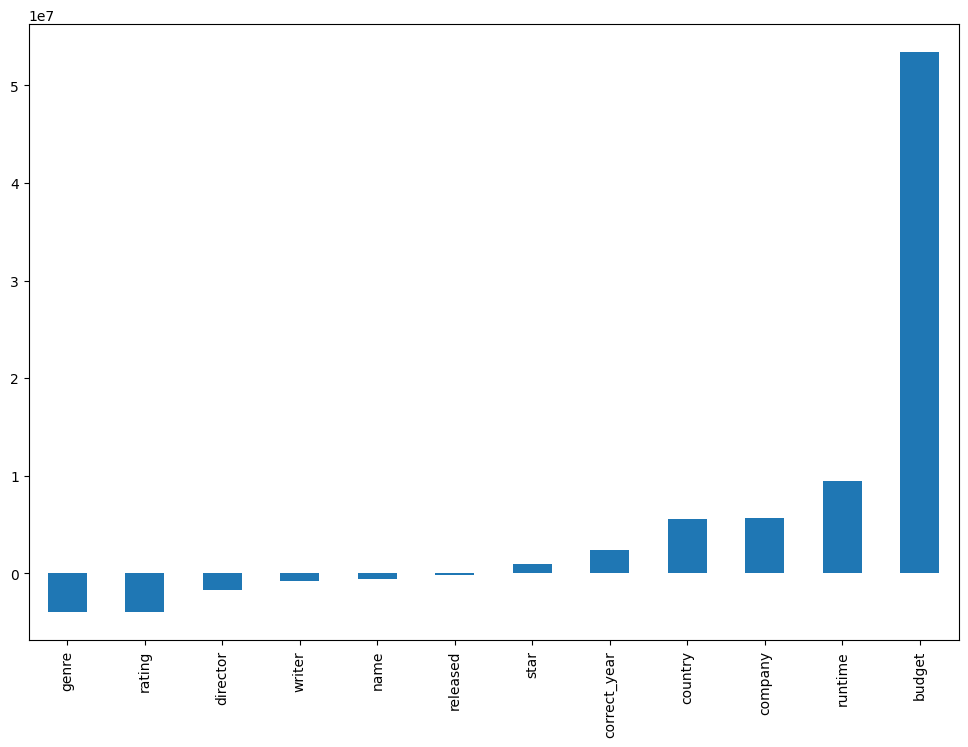

In [23]:
feature_importance_directional = pd.Series(index = X_movies.columns, data = gross_model.steps[1][1].coef_)

n_selected_features = (feature_importance_directional>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance_directional))*100))

feature_importance_directional.sort_values().tail(30).plot(kind = 'bar')

In [24]:
dummy_dic['genre']

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Drama',
 7: 'Family',
 8: 'Fantasy',
 9: 'History',
 10: 'Horror',
 11: 'Music',
 12: 'Musical',
 13: 'Mystery',
 14: 'Romance',
 15: 'Sci-Fi',
 16: 'Sport',
 17: 'Thriller',
 18: 'Western'}

In [25]:
dummy_dic['rating']

{0: 'Approved',
 1: 'G',
 2: 'NC-17',
 3: 'Not Rated',
 4: 'PG',
 5: 'PG-13',
 6: 'R',
 7: 'TV-14',
 8: 'TV-MA',
 9: 'TV-PG',
 10: 'Unrated',
 11: 'X'}

Since no features were removed and results are largely the same as those described by the OLS, we continue to conclude the large condition number from the OLS is due to large scaling differences between the predictor variables which is fine since the betas in OLS are estimated such that they convert units of each explanatory variable into units of the target variable appropriately. 

Our most confident conclusion remains budget is highly proportional to net profit meaning the more money a production puts into a film, the higher the film will likely earn. 